In [34]:
from IPython.display import Image     # Import the Image function from IPython.display to display images in Jupyter environments.
from os import chdir                  # Import chdir from os module to change the current working directory.
from scipy.spatial import Delaunay  # Importar Delaunay
import numpy as np                    # Import numpy library for working with n-dimensional arrays and mathematical operations.
import gudhi as gd                    # Import gudhi library for computational topology and computational geometry.
import matplotlib.pyplot as plt       # Import pyplot from matplotlib for creating visualizations and graphs.
import argparse                       # Import argparse, a standard library for writing user-friendly command-line interfaces.
import seaborn as sns                 # Import seaborn for data visualization; it's based on matplotlib and provides a high-level interface for drawing statistical graphs.
import requests # Import requests library to make HTTP requests in Python easily.
import pandas as pd
from scipy.spatial.distance import pdist, squareform 

In [35]:
import os
import requests
import csv

def descargar_contenido(url):
    try:
        respuesta = requests.get(url)
        respuesta.raise_for_status()  # Verificar si hay errores en la solicitud
        return respuesta.text
    except requests.exceptions.RequestException as e:
        print("Error al descargar el archivo:", e)
        return None

def convertir_a_csv_sin_titulos(contenido, nombre_archivo):
    try:
        # Separar el contenido por líneas
        lineas = contenido.strip().split('\n')

        # Obtener la ruta completa del archivo CSV
        ruta_archivo_csv = os.path.join("csv", nombre_archivo)

        # Escribir el contenido en un archivo CSV sin encabezados
        with open(ruta_archivo_csv, 'w', newline='') as archivo_csv:
            escritor_csv = csv.writer(archivo_csv)
            for linea in lineas:
                escritor_csv.writerow(linea.split(','))

        print(f"El archivo '{nombre_archivo}' se ha creado correctamente como CSV sin títulos.")
    except Exception as e:
        print("Error al convertir a CSV:", e)

# URLs de los archivos a convertir
urls_archivos = [
    "https://raw.githubusercontent.com/Luis0815/multicellularity_patterns_classification-/main/1",
    "https://raw.githubusercontent.com/Luis0815/multicellularity_patterns_classification-/main/2",
    "https://raw.githubusercontent.com/Luis0815/multicellularity_patterns_classification-/main/3"
]

# Crear la carpeta csv si no existe
if not os.path.exists("csv"):
    os.makedirs("csv")

for indice, url_archivo in enumerate(urls_archivos, start=1):
    contenido = descargar_contenido(url_archivo)
    if contenido:
        nombre_archivo = f"archivo_{indice}.csv"
        convertir_a_csv_sin_titulos(contenido, nombre_archivo)


El archivo 'archivo_1.csv' se ha creado correctamente como CSV sin títulos.
El archivo 'archivo_2.csv' se ha creado correctamente como CSV sin títulos.
El archivo 'archivo_3.csv' se ha creado correctamente como CSV sin títulos.


In [36]:
# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-alumno15/celulas/csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Mostrar las primeras filas del DataFrame
    print("Contenido de", archivo_csv)
    print(df.head(5))
    
    # Contar el número de IDs distintos
    num_ids_distintos = df['id'].nunique()
    print("Número de IDs distintos:", num_ids_distintos)


Contenido de archivo_2.csv
   id Tipo    X   Y  Z
0   4    B  126  80  0
1   4    B  127  80  0
2   4    B  128  80  0
3   4    B  129  80  0
4   1    A  109  81  0
Número de IDs distintos: 162
Contenido de archivo_1.csv
   id Tipo    X   Y  Z
0   4    B  129  83  0
1   4    B  130  83  0
2   4    B  131  83  0
3   4    B  132  83  0
4   7    A  142  83  0
Número de IDs distintos: 164
Contenido de archivo_3.csv
   id Tipo    X   Y  Z
0   1    B  105  81  0
1   1    B  106  81  0
2   1    B  107  81  0
3   1    B  108  81  0
4   1    B  103  82  0
Número de IDs distintos: 164
Contenido de 3.csv
   id Tipo    X   Y  Z
0   1    B  105  81  0
1   1    B  106  81  0
2   1    B  107  81  0
3   1    B  108  81  0
4   1    B  103  82  0
Número de IDs distintos: 164


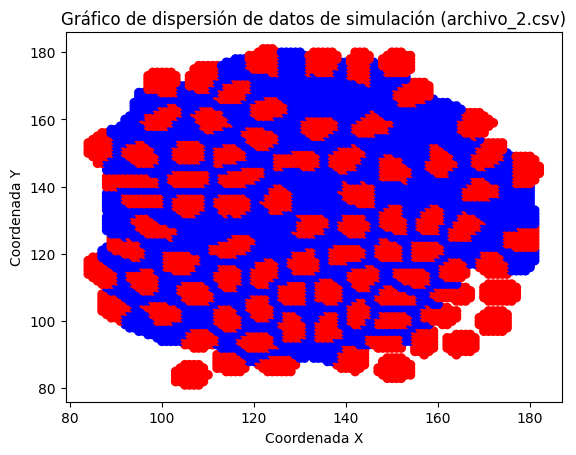

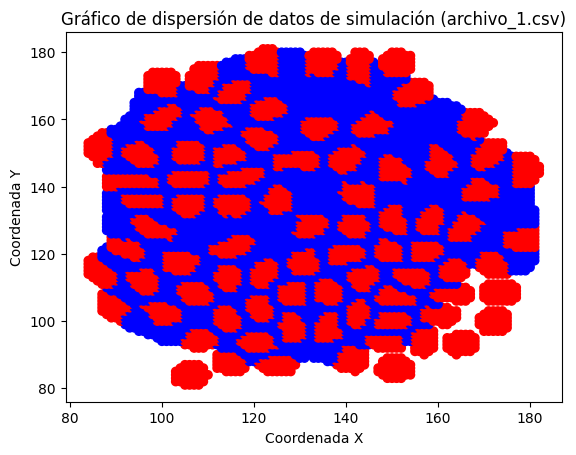

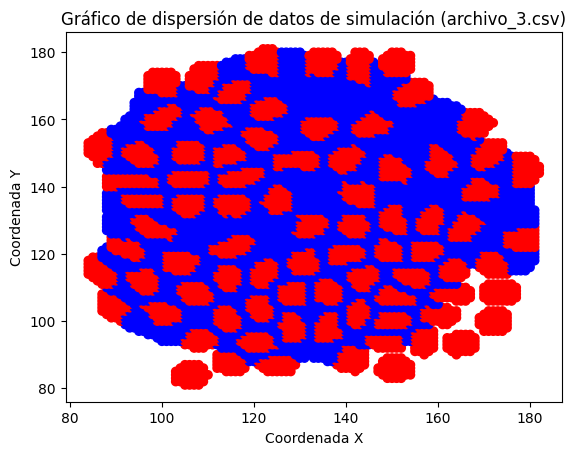

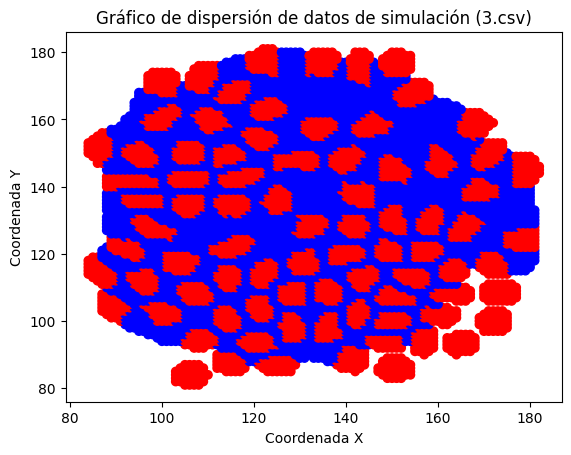

In [37]:
# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Extraer las coordenadas X e Y y el tipo
    X = df['X']
    Y = df['Y']
    tipo = df['Tipo']
    id1 = df['id']

    # Obtener todos los valores únicos de 'Tipo' en el DataFrame
    tipos_unicos = df['Tipo'].unique()
    
    # Crear un mapa de colores basado en los tipos
    colores = {tipo: 'b' if tipo == 'A' else 'r' for tipo in tipos_unicos}

    # Asignar colores a cada punto según el tipo
    colores_puntos = [colores[t] for t in tipo]

    # Crear el gráfico de dispersión
    plt.scatter(X, Y, c=colores_puntos)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación ({archivo_csv})')
    plt.show()


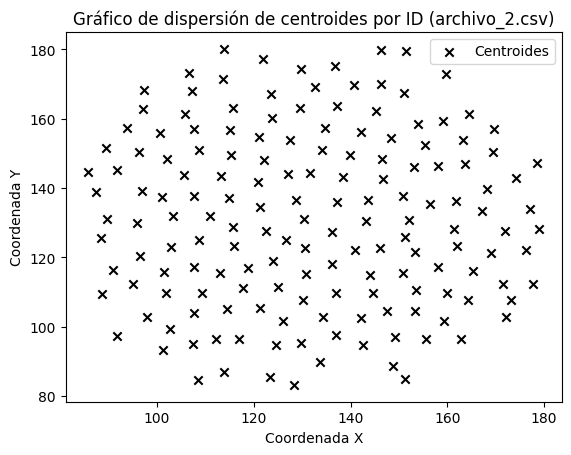

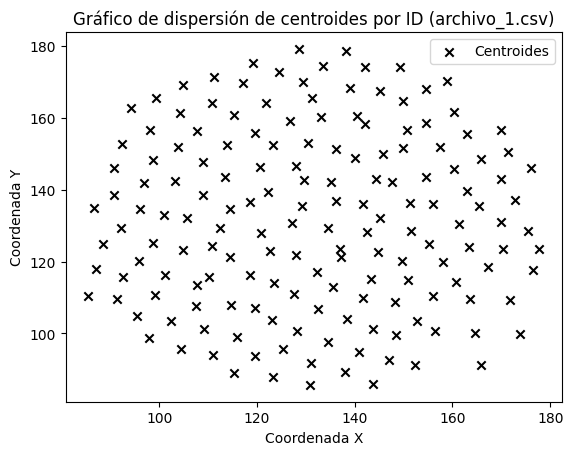

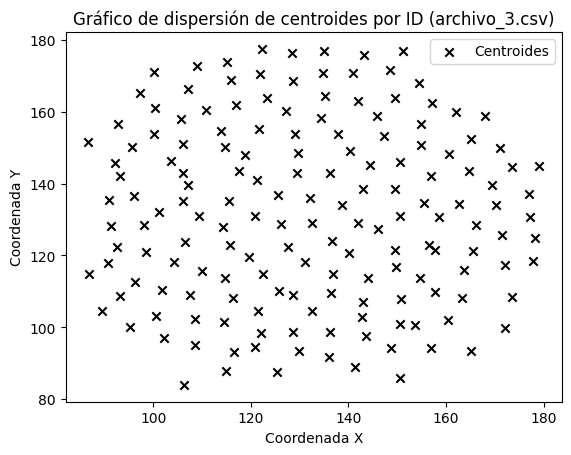

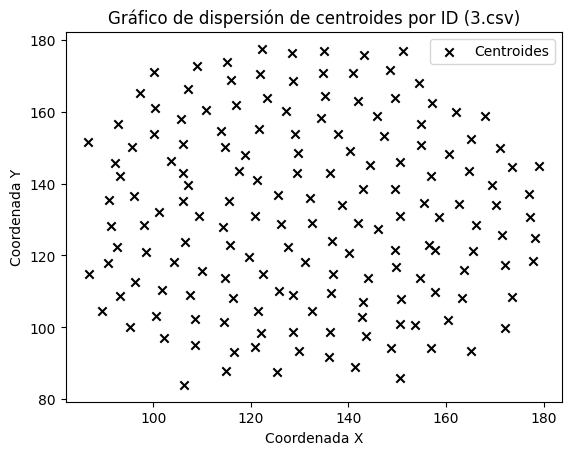

In [38]:
# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
       # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    
    # Agrupar los datos por el ID
    grupos = df.groupby('id')
    
    # Inicializar listas para almacenar los centroides
    centroides_x = []
    centroides_y = []
    
    # Calcular el centroide para cada grupo
    for id_grupo, grupo in grupos:
        X_grupo = grupo['X']
        Y_grupo = grupo['Y']
        centroid_x_grupo = X_grupo.mean()
        centroid_y_grupo = Y_grupo.mean()
        centroides_x.append(centroid_x_grupo)
        centroides_y.append(centroid_y_grupo)
    
    # Crear el gráfico de dispersión solo con los centroides
    plt.scatter(centroides_x, centroides_y, color='black', marker='x', label='Centroides')  # Agregar los centroides al gráfico
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de centroides por ID ({archivo_csv})')
    plt.legend()  # Mostrar la leyenda con la etiqueta de los centroides
    plt.show()


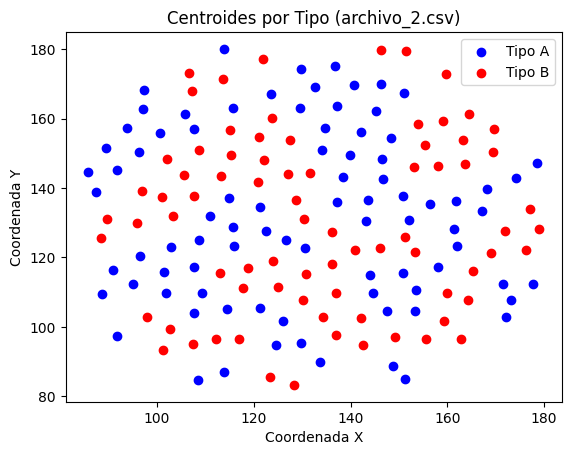

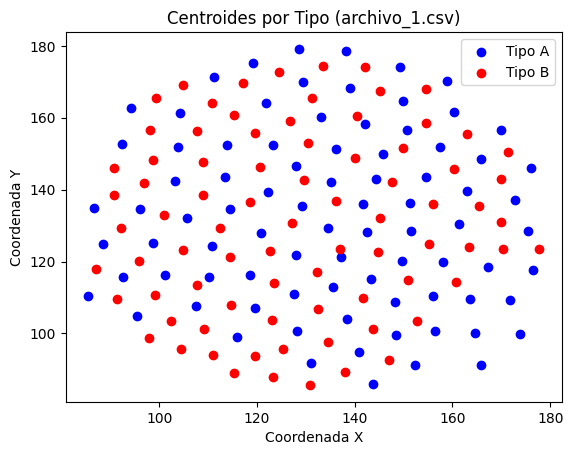

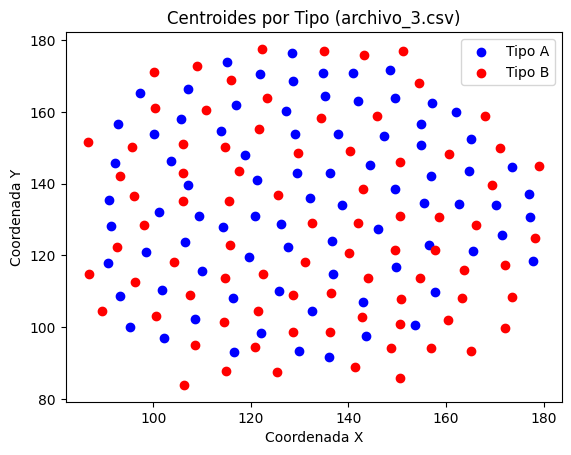

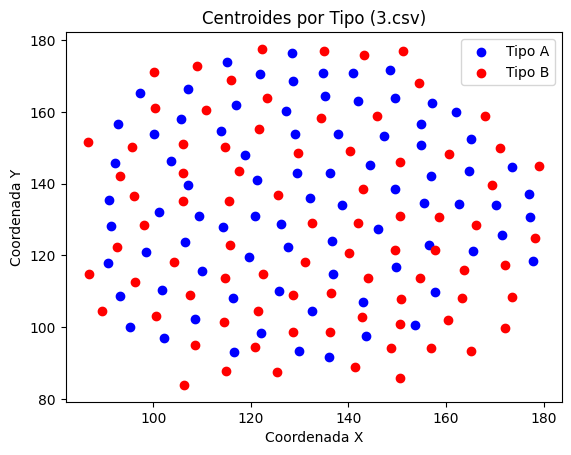

In [39]:
# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Agrupar los datos por el ID y el Tipo
    grupos = df.groupby(['id', 'Tipo'])
    
    # Inicializar listas para almacenar los centroides y tipos
    centroides_x = []
    centroides_y = []
    tipos_centroides = []
    
    # Calcular el centroide y el tipo para cada grupo
    for (id_grupo, tipo_grupo), grupo in grupos:
        X_grupo = grupo['X']
        Y_grupo = grupo['Y']
        centroid_x_grupo = X_grupo.mean()
        centroid_y_grupo = Y_grupo.mean()
        centroides_x.append(centroid_x_grupo)
        centroides_y.append(centroid_y_grupo)
        tipos_centroides.append(tipo_grupo)  # Guardar el tipo del grupo
    
    # Crear el gráfico de dispersión con centroides rojos y azules
    for tipo in set(tipos_centroides):
        color = 'b' if tipo == 'A' else 'r'  # Rojo para tipo 'A', azul para tipo 'B'
        indices_tipo = [i for i, t in enumerate(tipos_centroides) if t == tipo]
        centroides_x_tipo = [centroides_x[i] for i in indices_tipo]
        centroides_y_tipo = [centroides_y[i] for i in indices_tipo]
        plt.scatter(centroides_x_tipo, centroides_y_tipo, color=color, label=f'Tipo {tipo}')

    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Centroides por Tipo ({archivo_csv})')
    plt.legend()
    plt.show()


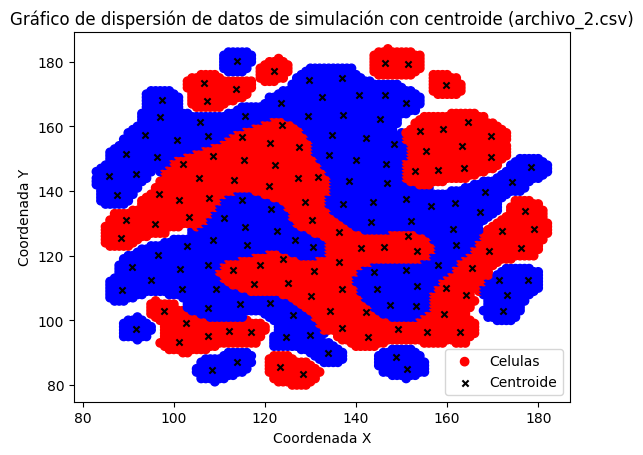

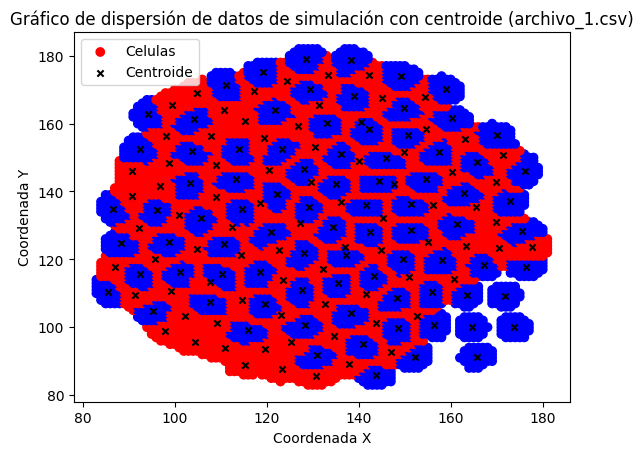

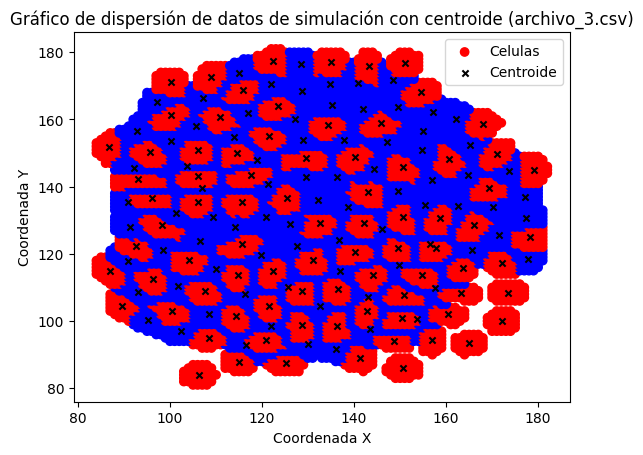

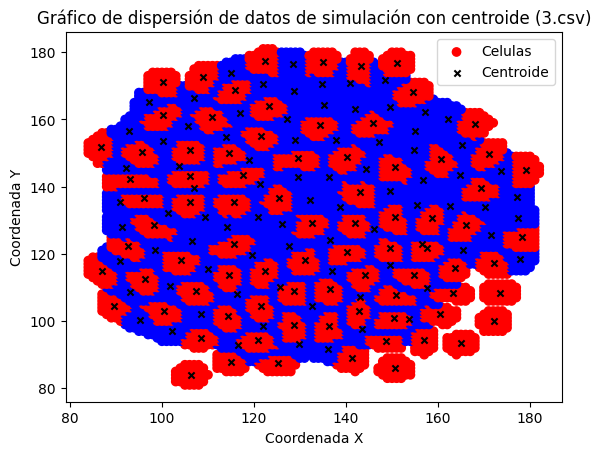

DataFrame 1:
     centroides_x  centroides_y id
0      108.372093     84.651163  A
1      113.850000     87.100000  A
2      123.404762     85.523810  B
3      128.285714     83.238095  B
4      133.743590     89.846154  A
..            ...           ... ..
157    121.925000    177.200000  B
158    129.760870    174.369565  A
159    136.847826    175.086957  A
160    146.268293    179.756098  B
161    151.365854    179.414634  B

[162 rows x 3 columns]

DataFrame 2:
     centroides_x  centroides_y id
0      110.936170     93.936170  B
1      115.400000     88.955556  B
2      123.346939     87.836735  B
3      130.755556     85.688889  B
4      137.916667     89.166667  B
..            ...           ... ..
159    124.437500    172.687500  B
160    128.555556    179.133333  A
161    138.282609    178.673913  A
162    142.142857    174.214286  B
163    145.127660    167.489362  B

[164 rows x 3 columns]

DataFrame 3:
     centroides_x  centroides_y id
0      106.255814     83.953488  B
1

In [40]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# Ruta del directorio que contiene los archivos CSV
ruta_directorio = "/home/jupyter-alumno15/celulas/csv"

# Obtener una lista de todos los archivos CSV en la ruta especificada
archivos_csv = [archivo for archivo in os.listdir(ruta_directorio) if archivo.endswith('.csv')]

# Inicializar una lista para almacenar los DataFrames
dataframes = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Extraer las coordenadas X e Y y el tipo
    X = df['X']
    Y = df['Y']
    tipo = df['Tipo']
    
    # Crear un mapa de colores basado en los tipos
    colores = {'A': 'b', 'B': 'r'}  # Ajusta los colores según tus necesidades
    
    # Asignar colores a cada punto según el tipo
    colores_puntos = [colores[t] for t in tipo]
    
    # Agrupar los datos por el ID
    grupos = df.groupby('id')
    
    # Inicializar listas para almacenar los centroides
    centroides_x = []
    centroides_y = []
    tipos_centroides = []
    
    # Calcular el centroide para cada grupo
    for id_grupo, grupo in grupos:
        X_grupo = grupo['X']
        Y_grupo = grupo['Y']
        centroid_x_grupo = X_grupo.mean()
        centroid_y_grupo = Y_grupo.mean()
        centroides_x.append(centroid_x_grupo)
        centroides_y.append(centroid_y_grupo)
        # Suponiendo que el tipo del centroide es el tipo más frecuente en el grupo
        tipo_centroide = grupo['Tipo'].mode()[0]
        tipos_centroides.append(tipo_centroide)
    
    # Crear el gráfico de dispersión combinado
    plt.scatter(X, Y, c=colores_puntos, label='Celulas')
    plt.scatter(centroides_x, centroides_y, color='black', marker='x', s=20, label='Centroide')  # Agregar el centroide al gráfico
    
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title(f'Gráfico de dispersión de datos de simulación con centroide ({archivo_csv})')
    plt.legend() 
    plt.show()
    
    # Crear un DataFrame para cada lista de centroides
    df_centroides = pd.DataFrame({"centroides_x": centroides_x, "centroides_y": centroides_y, "id": tipos_centroides})
    dataframes.append(df_centroides)

# Imprimir los DataFrames
for i, df in enumerate(dataframes):
    print(f"DataFrame {i+1}:")
    print(df)
    print()


In [41]:
# Inicializar una lista para almacenar las matrices de distancias
matrices_distancias = []

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Agrupar los datos por el ID
    grupos = df.groupby('id')
    
    # Inicializar listas para almacenar los centroides
    centroides_x = []
    centroides_y = []
    
    # Calcular el centroide para cada grupo
    for id_grupo, grupo in grupos:
        X_grupo = grupo['X']
        Y_grupo = grupo['Y']
        centroid_x_grupo = X_grupo.mean()
        centroid_y_grupo = Y_grupo.mean()
        centroides_x.append(centroid_x_grupo)
        centroides_y.append(centroid_y_grupo)
    
    # Crear un DataFrame para los centroides
    df_centroides = pd.DataFrame({"centroides_x": centroides_x, "centroides_y": centroides_y})
    
    # Calcular la matriz de distancias
    matrix_distance = pdist(df_centroides[['centroides_x', 'centroides_y']], metric='euclidean')
    matrices_distancias.append(squareform(matrix_distance))

# Imprimir las matrices de distancias
for i, matrix in enumerate(matrices_distancias):
    print(f"Matriz de distancias para DataFrame {i+1}:")
    print(matrix)
    print()

    # Iterar sobre cada matriz de distancias
for i, matrix_distance in enumerate(matrices_distancias):
    # Obtener la forma de la matriz de distancias
    forma_matriz = np.shape(matrix_distance)[0]
    print(f"Forma de la matriz de distancias para DataFrame {i+1}: {forma_matriz}")
    
    # Calcular el valor máximo
    maximo = matrix_distance.max()
    print(f"Valor máximo de la matriz de distancias: {maximo}")
    
    # Calcular el valor mínimo
    minimo = matrix_distance.min()
    print(f"Valor mínimo de la matriz de distancias: {minimo}")
    
    # Calcular el promedio
    promedio = matrix_distance.mean()
    print(f"Promedio de la matriz de distancias: {promedio}")

Matriz de distancias para DataFrame 1:
[[  0.           6.0003557   15.05797616 ...  94.81297465 102.37709981
  104.06045818]
 [  6.0003557    0.           9.6838965  ...  90.94286406  98.16362929
   99.64653006]
 [ 15.05797616   9.6838965    0.         ...  90.56640257  96.96630935
   97.96585936]
 ...
 [ 94.81297465  90.94286406  90.56640257 ...   0.          10.51408907
   15.14932072]
 [102.37709981  98.16362929  96.96630935 ...  10.51408907   0.
    5.10898475]
 [104.06045818  99.64653006  97.96585936 ...  15.14932072   5.10898475
    0.        ]]

Matriz de distancias para DataFrame 2:
[[ 0.          6.68822089 13.82860405 ... 89.04107343 86.13032647
  81.1118359 ]
 [ 6.68822089  0.          8.02530972 ... 92.59048251 89.35452689
  83.9719742 ]
 [13.82860405  8.02530972  0.         ... 92.05686941 88.39891327
  82.57687805]
 ...
 [89.04107343 92.59048251 92.05686941 ...  0.          5.89828738
  13.11292913]
 [86.13032647 89.35452689 88.39891327 ...  5.89828738  0.
   7.35755724]

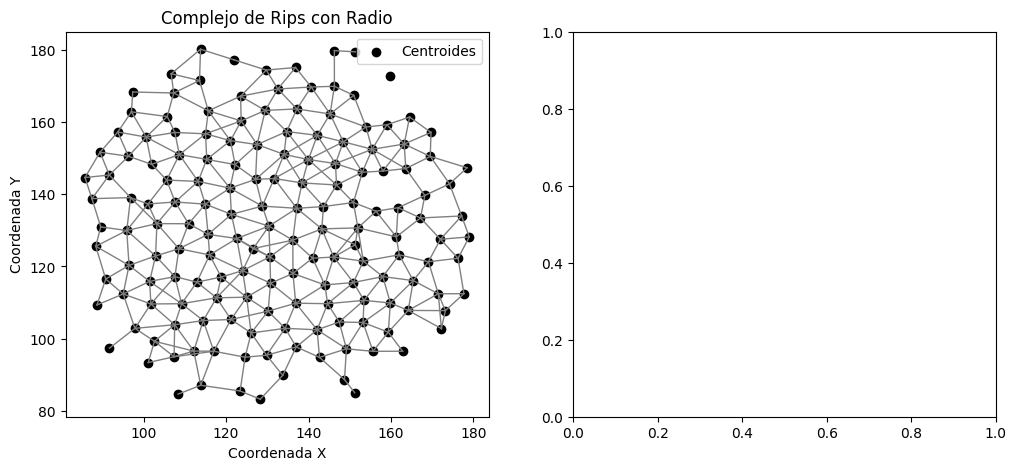

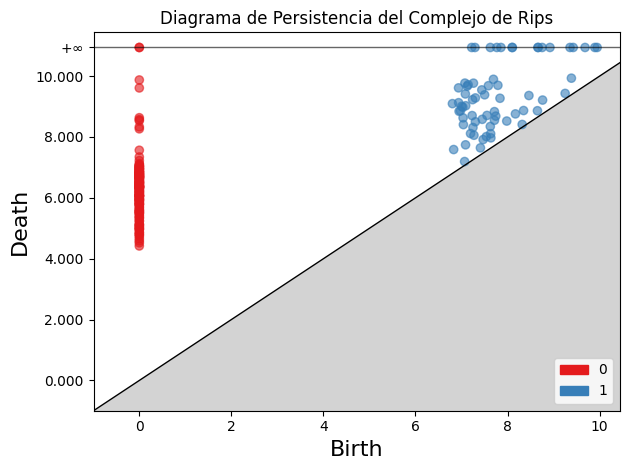

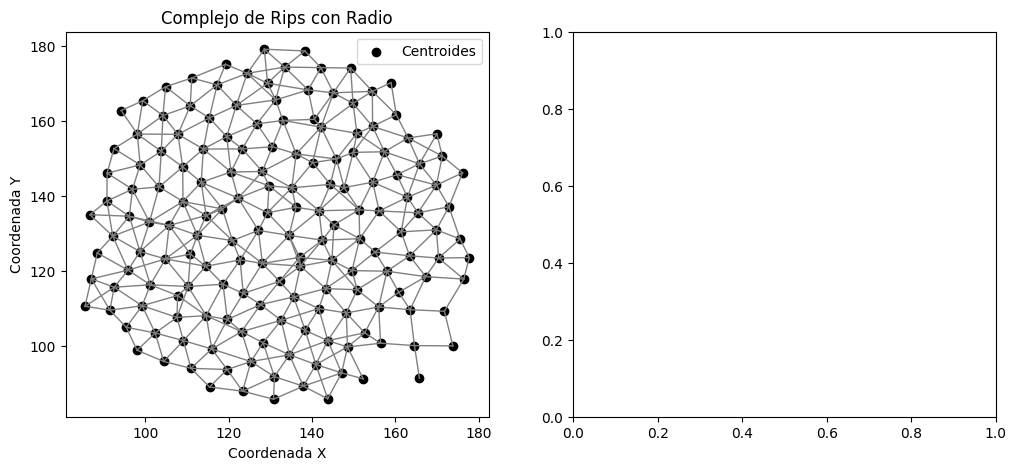

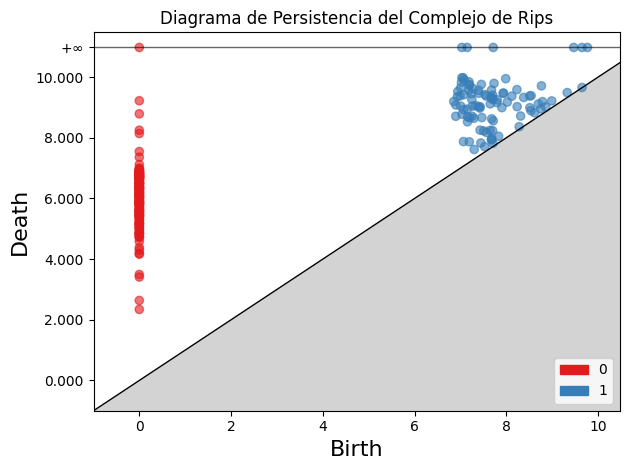

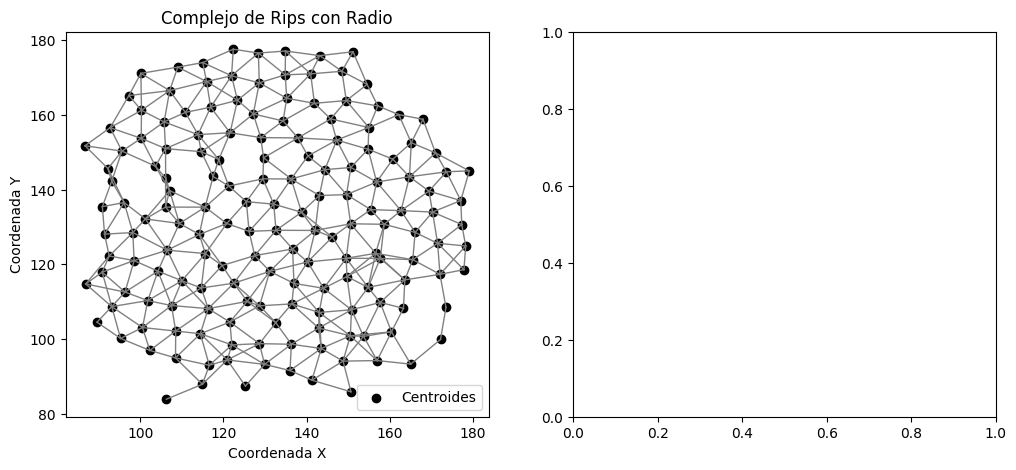

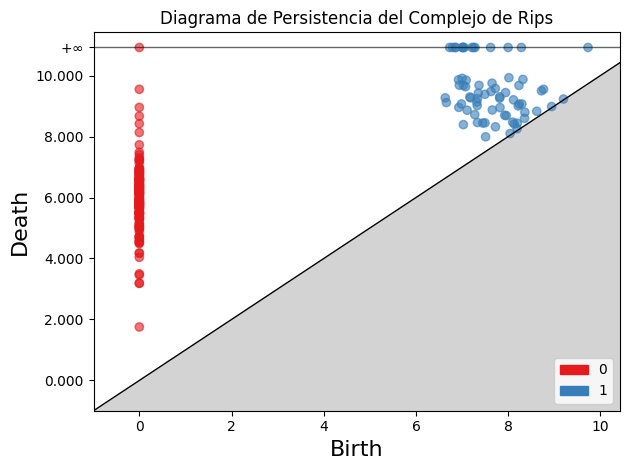

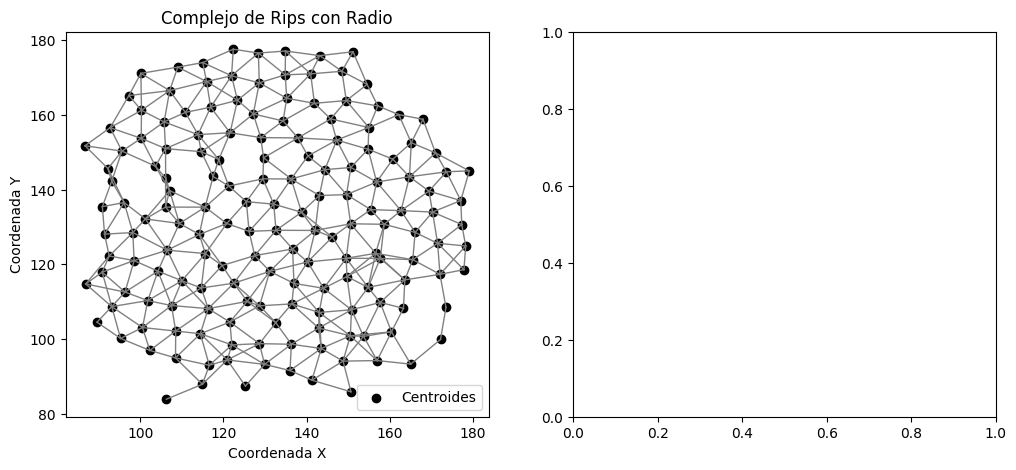

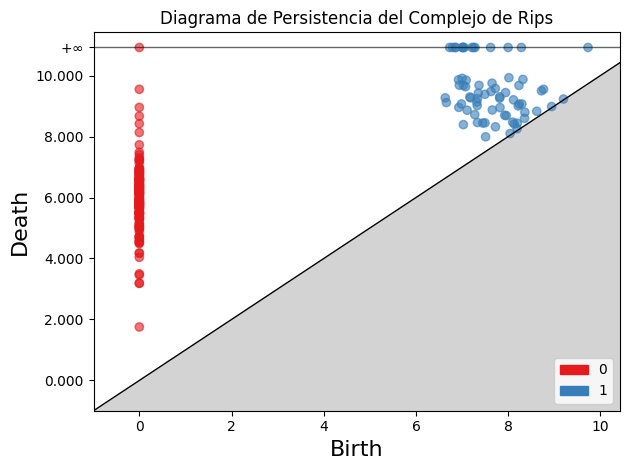

In [46]:
# Crear la carpeta para guardar los diagramas de persistencia si no existe
# ruta_salida = "prueba_distancia"
# if not os.path.exists(ruta_salida):
#     os.makedirs(ruta_salida)

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    # Construir la ruta completa del archivo
    ruta_completa = os.path.join(ruta_directorio, archivo_csv)
    
    # Leer el archivo CSV y asignar nombres de columnas
    df = pd.read_csv(ruta_completa, header=None)
    nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
    df.columns = nombres_columnas
    
    # Agrupar los datos por el ID
    grupos = df.groupby('id')
    
    # Inicializar listas para almacenar los centroides
    centroides_x = []
    centroides_y = []
    
    # Calcular el centroide para cada grupo
    for id_grupo, grupo in grupos:
        X_grupo = grupo['X']
        Y_grupo = grupo['Y']
        centroid_x_grupo = X_grupo.mean()
        centroid_y_grupo = Y_grupo.mean()
        centroides_x.append(centroid_x_grupo)
        centroides_y.append(centroid_y_grupo)
    
    # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
    puntos = np.array(list(zip(centroides_x, centroides_y)))

    # Calcular el complejo de Rips con un radio específico
    rips_complex = gd.RipsComplex(points=puntos, max_edge_length=10)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

    # Visualizar el complejo de Rips
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
    for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
        if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
            arista = simplex[0]
            x = [centroides_x[i] for i in arista]
            y = [centroides_y[i] for i in arista]
            plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
    plt.xlabel('Coordenada X')
    plt.ylabel('Coordenada Y')
    plt.title('Complejo de Rips con Radio')
    plt.legend()

    # Calcular el diagrama de persistencia
    diag = simplex_tree.persistence()

       

    # Mostrar el diagrama de dispersión de persistencia
    plt.subplot(1, 2, 2)
    gd.plot_persistence_diagram(diag)
    plt.title('Diagrama de Persistencia del Complejo de Rips')
    plt.xlabel('Birth')
    plt.ylabel('Death')

    plt.tight_layout()
    plt.show()


/opt/tljh/user/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


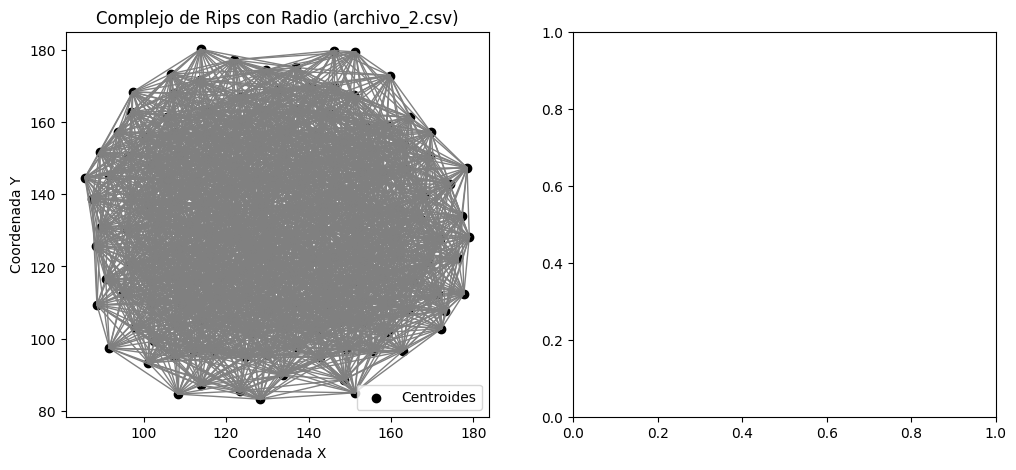

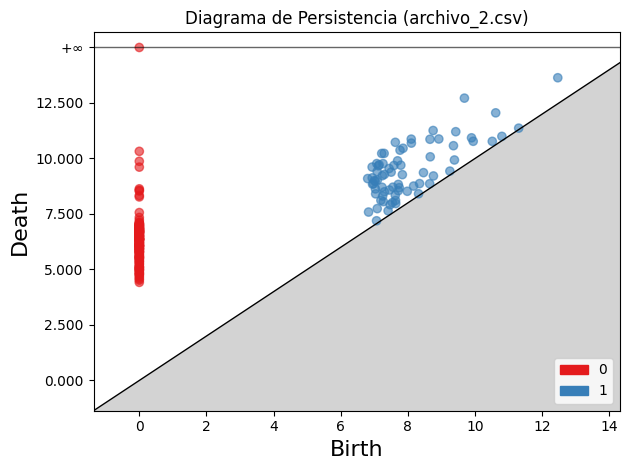

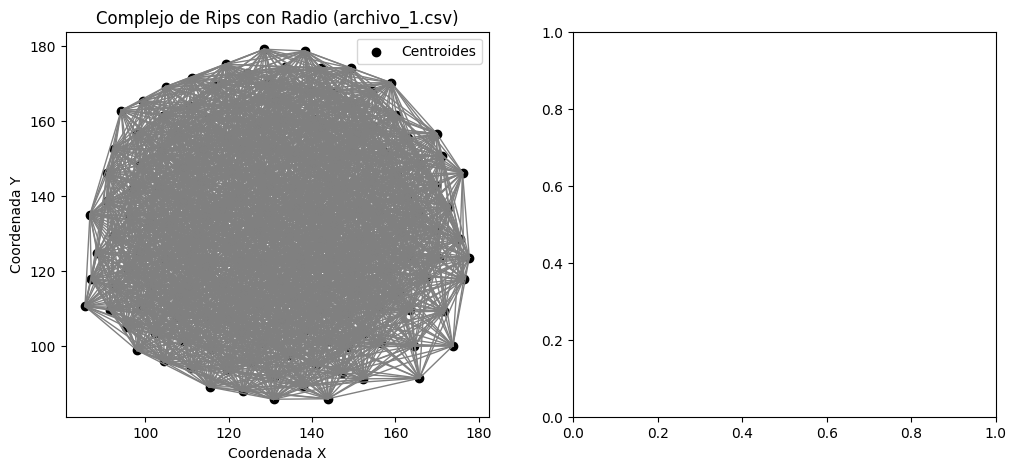

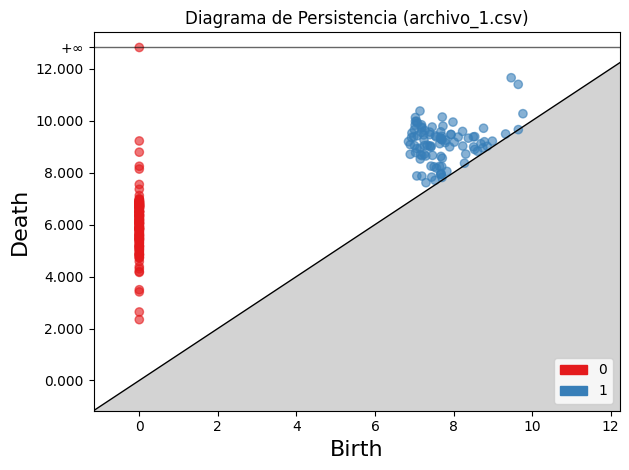

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


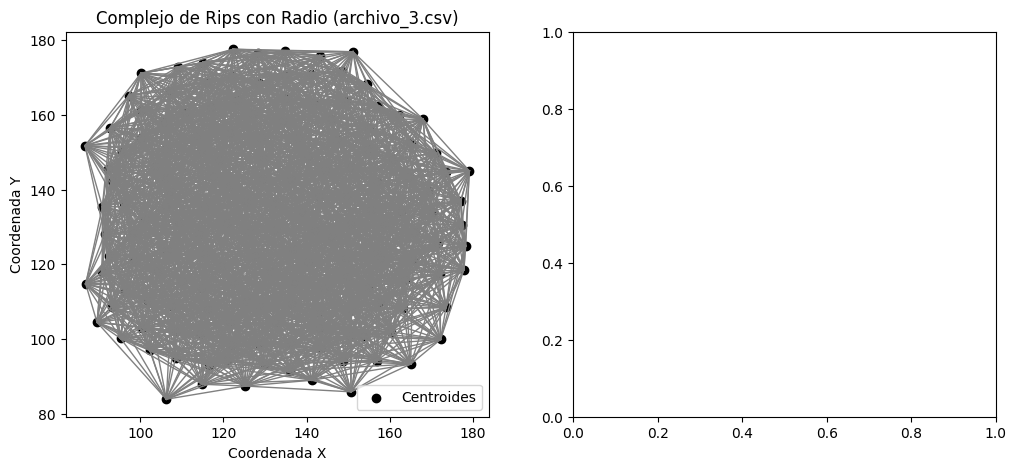

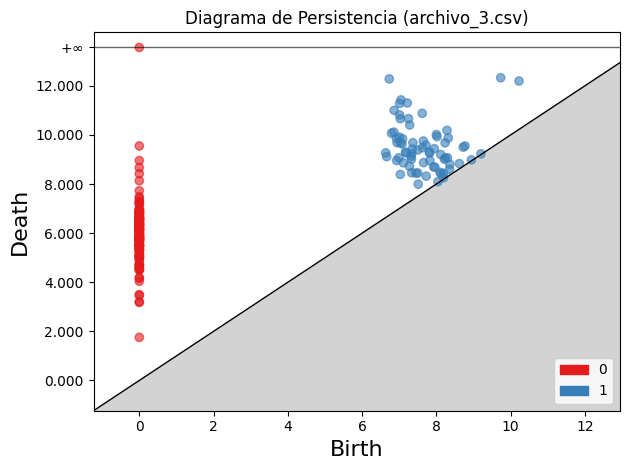

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


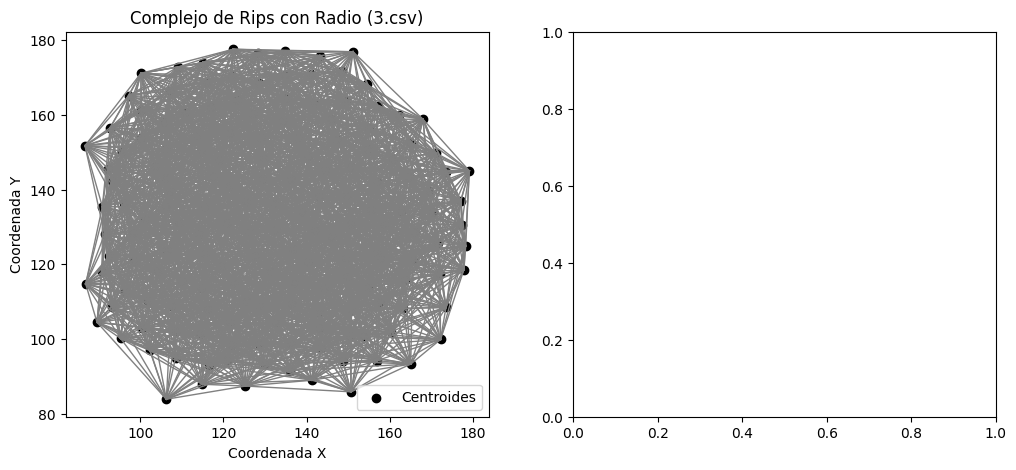

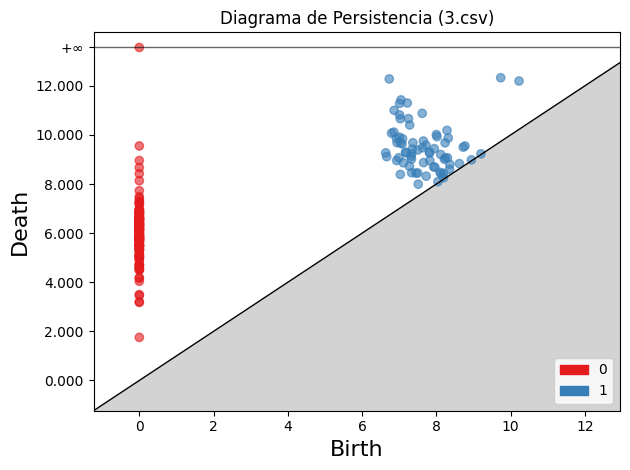

Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y archivo_2.csv: 1.2791398240964786e-308
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y archivo_2.csv: 8.818216324113643e-309
Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y archivo_1.csv: 1.064532981214672
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y archivo_1.csv: 1.363429365872273
Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y archivo_3.csv: 1.407770115704965
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y archivo_3.csv: 1.5919284252475427
Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y 3.csv: 1.407770115704965
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y 3.csv: 1.5919284252475427
Distancia de Bottleneck (Dimensión 1) entre archivo_1.csv y archivo_1.csv: 1.3115885311869553e-308
Distancia de Bottleneck (Dimensión 0) entre archivo_1.csv y archivo_1.csv: 1.746609595864227e-308
Distancia de Bottleneck (Dimensión 1) entre archivo_1.csv y ar

In [49]:
# Almacenar los diagramas de persistencia y los nombres de los archivos
diagramas_persistencia = {}
diagramas_persistencia_0 = {}

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    try:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el ID
        grupos = df.groupby('id')
        
        # Inicializar listas para almacenar los centroides
        centroides_x = []
        centroides_y = []
        
        # Calcular el centroide para cada grupo
        for id_grupo, grupo in grupos:
            X_grupo = grupo['X']
            Y_grupo = grupo['Y']
            centroid_x_grupo = X_grupo.mean()
            centroid_y_grupo = Y_grupo.mean()
            centroides_x.append(centroid_x_grupo)
            centroides_y.append(centroid_y_grupo)
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(centroides_x, centroides_y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=30)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [centroides_x[i] for i in arista]
                y = [centroides_y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        
        # Guardar la figura
        plt.savefig(os.path.join(ruta_salida, f'diagrama_persistencia_{archivo_csv}.png'))
        plt.show()

        # Almacenar los diagramas de persistencia
        diagramas_persistencia[archivo_csv] = simplex_tree.persistence_intervals_in_dimension(1)
        diagramas_persistencia_0[archivo_csv] = simplex_tree.persistence_intervals_in_dimension(0)
        
    except Exception as e:
        print(f"Error al procesar el archivo {archivo_csv}: {e}")

# Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia
archivos = list(diagramas_persistencia.keys())
n = len(archivos)
for i in range(n):
    for j in range(i , n):
        archivo_i = archivos[i]
        archivo_j = archivos[j]
        diag_i = diagramas_persistencia[archivo_i]
        diag_j = diagramas_persistencia[archivo_j]
        diag_i_0 = diagramas_persistencia_0[archivo_i]
        diag_j_0 = diagramas_persistencia_0[archivo_j]
        
        distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
        distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
        
        print(f"Distancia de Bottleneck (Dimensión 1) entre {archivo_i} y {archivo_j}: {distancia_bottleneck}")
        print(f"Distancia de Bottleneck (Dimensión 0) entre {archivo_i} y {archivo_j}: {distancia_bottleneck_0}")


/opt/tljh/user/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


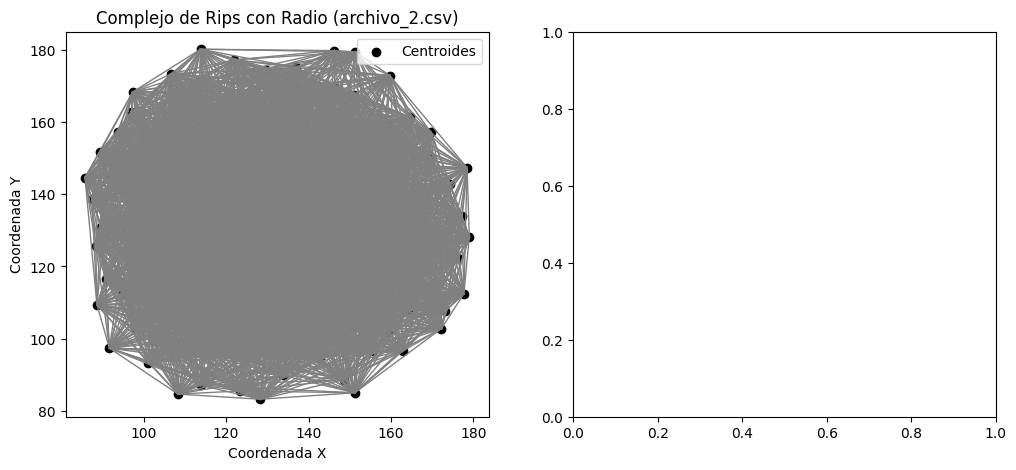

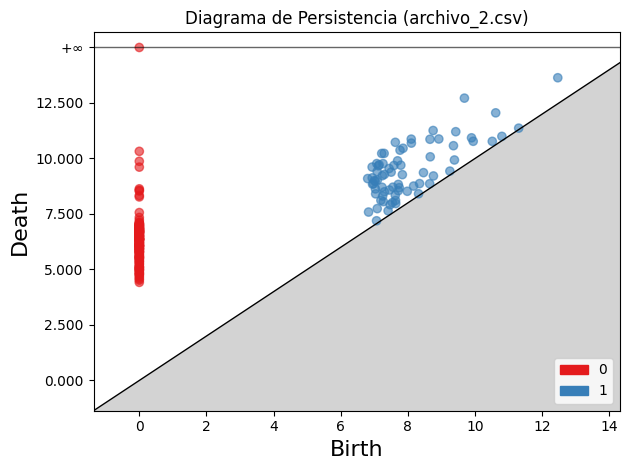

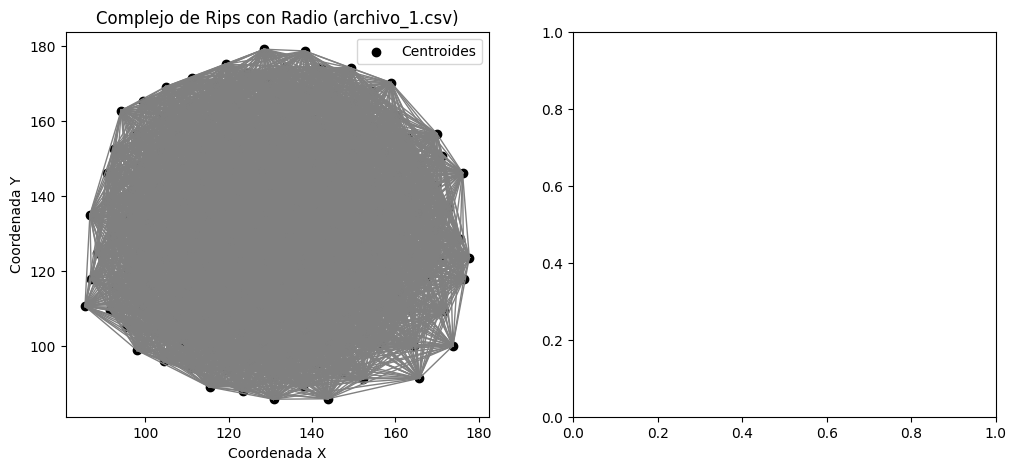

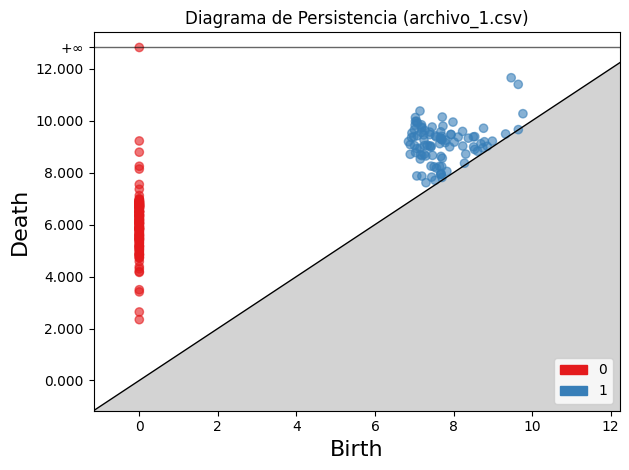

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


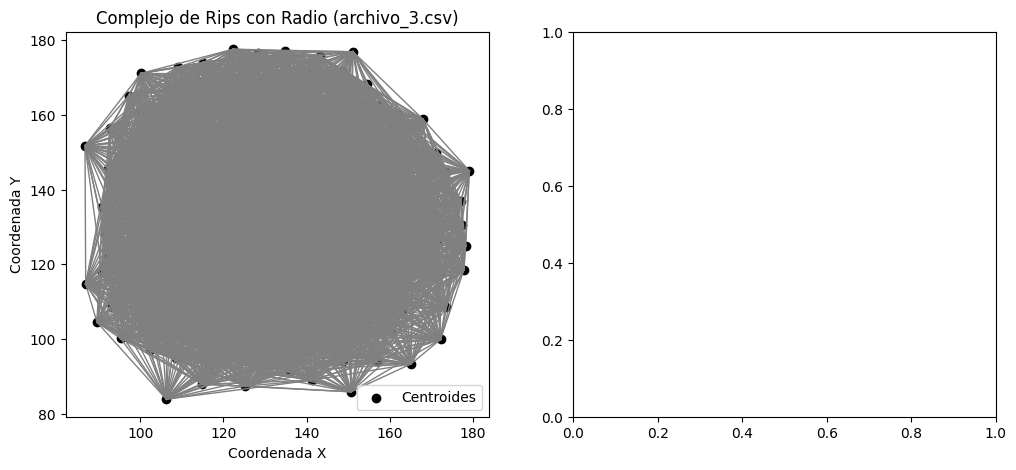

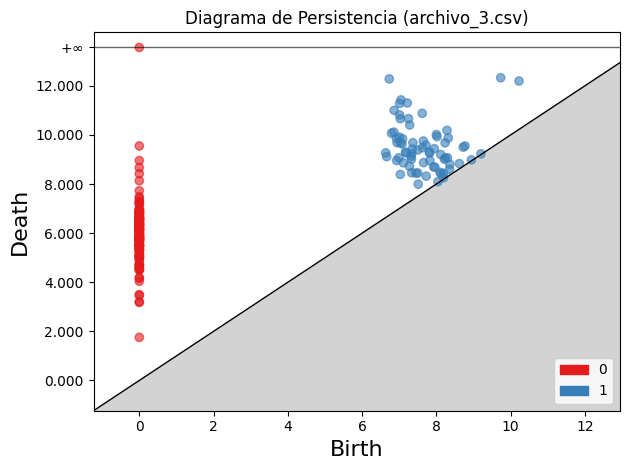

/opt/tljh/user/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


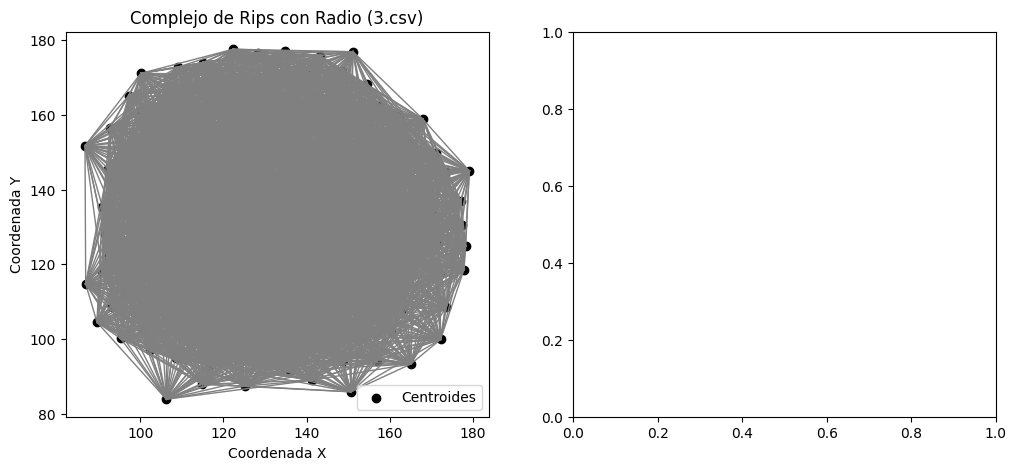

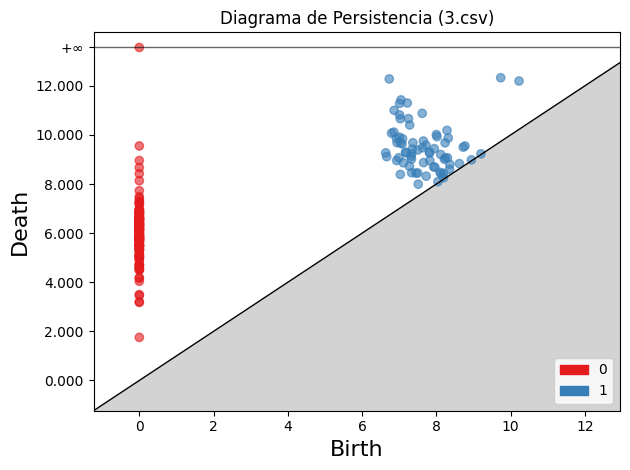

Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y archivo_2.csv: 1.2791398240964786e-308
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y archivo_2.csv: 8.818216324113643e-309
Distancia de Bottleneck (Dimensión 1) para archivo_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0) para archivo_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y archivo_1.csv: 1.064532981214672
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y archivo_1.csv: 1.363429365872273
Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y archivo_3.csv: 1.407770115704965
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y archivo_3.csv: 1.5919284252475427
Distancia de Bottleneck (Dimensión 1) entre archivo_2.csv y 3.csv: 1.407770115704965
Distancia de Bottleneck (Dimensión 0) entre archivo_2.csv y 3.csv: 1.5919284252475427
Distancia de Bottleneck (Dimensión 1) entre archivo_1.csv y archivo_1.csv: 1.3115885311869553e-308


In [53]:
# Almacenar los diagramas de persistencia y los nombres de los archivos
diagramas_persistencia = {}
diagramas_persistencia_0 = {}

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    try:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el ID
        grupos = df.groupby('id')
        
        # Inicializar listas para almacenar los centroides
        centroides_x = []
        centroides_y = []
        
        # Calcular el centroide para cada grupo
        for id_grupo, grupo in grupos:
            X_grupo = grupo['X']
            Y_grupo = grupo['Y']
            centroid_x_grupo = X_grupo.mean()
            centroid_y_grupo = Y_grupo.mean()
            centroides_x.append(centroid_x_grupo)
            centroides_y.append(centroid_y_grupo)
        
        # Convertir las coordenadas de los centroides a un formato adecuado para gudhi
        puntos = np.array(list(zip(centroides_x, centroides_y)))

        # Calcular el complejo de Rips con un radio específico
        rips_complex = gd.RipsComplex(points=puntos, max_edge_length=40)
        simplex_tree = rips_complex.create_simplex_tree(max_dimension=3)

        # Visualizar el complejo de Rips
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.scatter(centroides_x, centroides_y, color='black', label='Centroides')
        for simplex in simplex_tree.get_skeleton(1):  # Obtener las aristas
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [centroides_x[i] for i in arista]
                y = [centroides_y[i] for i in arista]
                plt.plot(x, y, color='gray', linestyle='-', linewidth=1)
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title(f'Complejo de Rips con Radio ({archivo_csv})')
        plt.legend()

        # Calcular el diagrama de persistencia
        diag = simplex_tree.persistence()

        # Mostrar el diagrama de dispersión de persistencia
        plt.subplot(1, 2, 2)
        gd.plot_persistence_diagram(diag)
        plt.title(f'Diagrama de Persistencia ({archivo_csv})')
        plt.xlabel('Birth')
        plt.ylabel('Death')

        plt.tight_layout()
        
        # Guardar la figura
        plt.savefig(os.path.join(ruta_salida, f'diagrama_persistencia_{archivo_csv}.png'))
        plt.show()

        # Almacenar los diagramas de persistencia
        diagramas_persistencia[archivo_csv] = simplex_tree.persistence_intervals_in_dimension(1)
        diagramas_persistencia_0[archivo_csv] = simplex_tree.persistence_intervals_in_dimension(0)
        
    except Exception as e:
        print(f"Error al procesar el archivo {archivo_csv}: {e}")

# Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia
archivos = list(diagramas_persistencia.keys())
n = len(archivos)
tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero
for i in range(n):
    for j in range(i, n):
        archivo_i = archivos[i]
        archivo_j = archivos[j]
        diag_i = diagramas_persistencia[archivo_i]
        diag_j = diagramas_persistencia[archivo_j]
        diag_i_0 = diagramas_persistencia_0[archivo_i]
        diag_j_0 = diagramas_persistencia_0[archivo_j]
        
        distancia_bottleneck = gd.bottleneck_distance(diag_i, diag_j)
        distancia_bottleneck_0 = gd.bottleneck_distance(diag_i_0, diag_j_0)
        
        print(f"Distancia de Bottleneck (Dimensión 1) entre {archivo_i} y {archivo_j}: {distancia_bottleneck}")
        print(f"Distancia de Bottleneck (Dimensión 0) entre {archivo_i} y {archivo_j}: {distancia_bottleneck_0}")
        
        # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
        if i == j:
            if distancia_bottleneck < tolerancia:
                print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} es efectivamente cero.")
            else:
                print(f"Distancia de Bottleneck (Dimensión 1) para {archivo_i} no es cero: {distancia_bottleneck}")
            
            if distancia_bottleneck_0 < tolerancia:
                print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} es efectivamente cero.")
            else:
                print(f"Distancia de Bottleneck (Dimensión 0) para {archivo_i} no es cero: {distancia_bottleneck_0}")


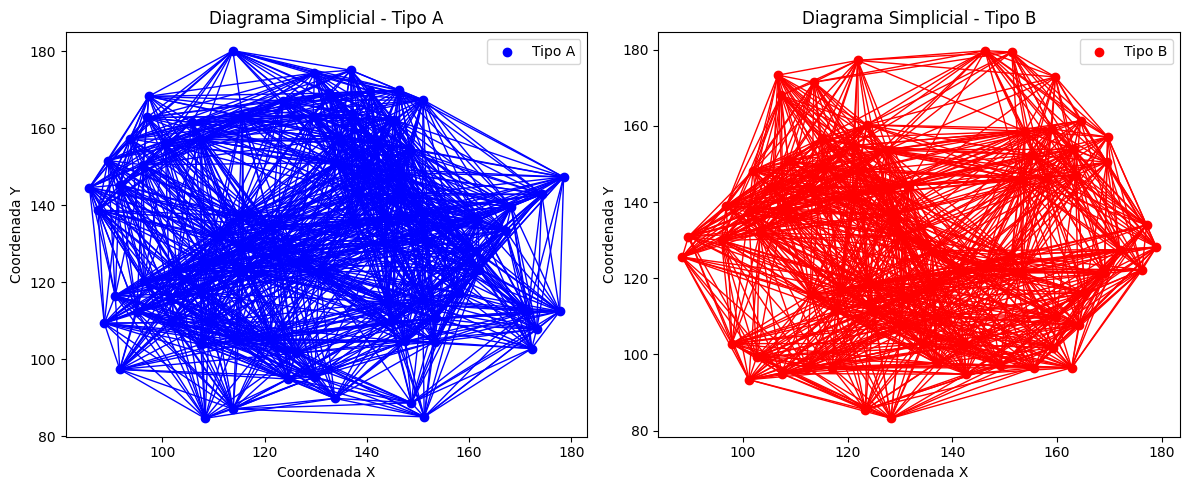

<Figure size 1200x500 with 0 Axes>

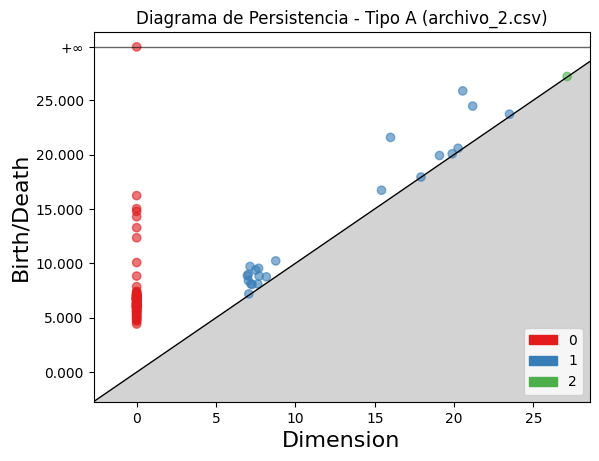

<Figure size 1200x500 with 0 Axes>

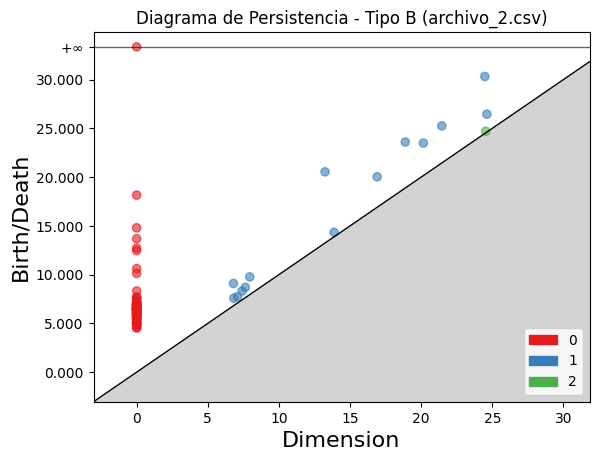

Distancia de Bottleneck: 2.9216787065065404
Distancia de Bottleneck: 2.620640157032117
Procesado el archivo archivo_2.csv


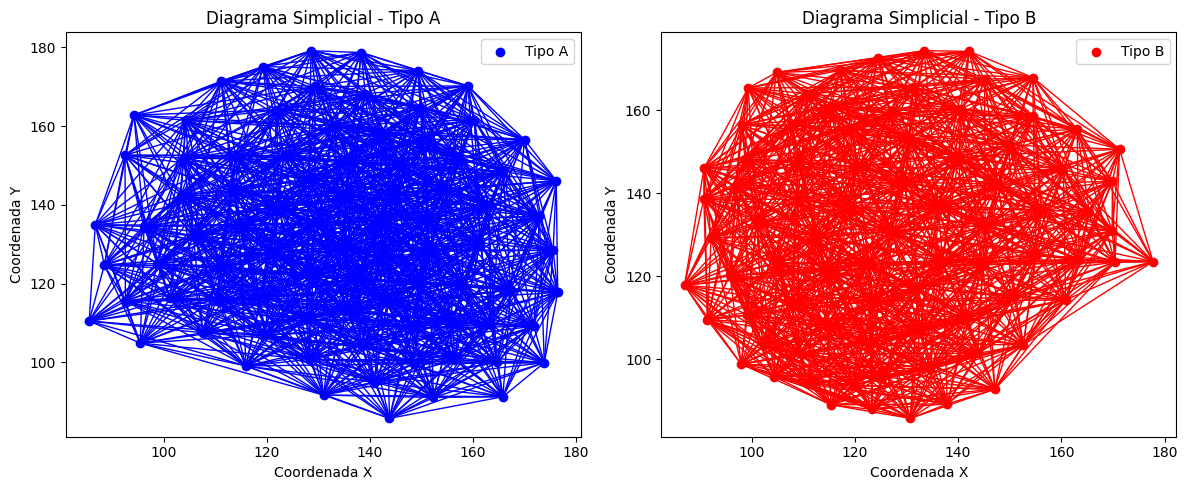

<Figure size 1200x500 with 0 Axes>

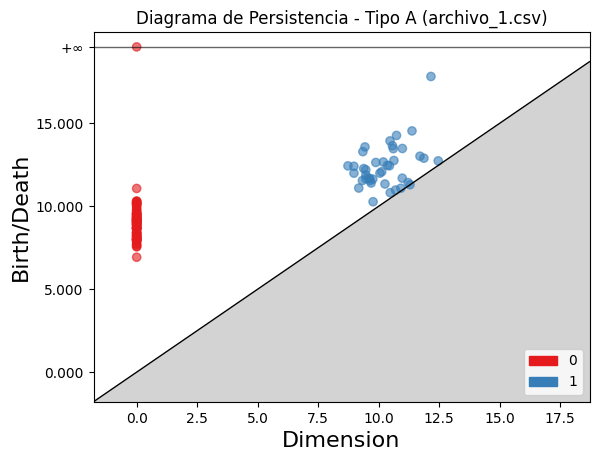

<Figure size 1200x500 with 0 Axes>

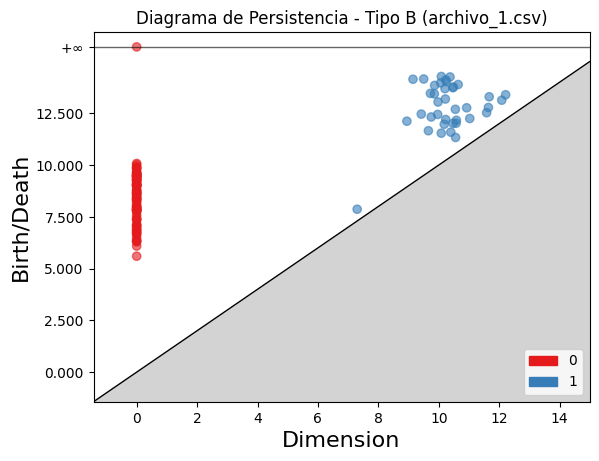

Distancia de Bottleneck: 2.8300872862228665
Distancia de Bottleneck: 3.852409124263473
Procesado el archivo archivo_1.csv


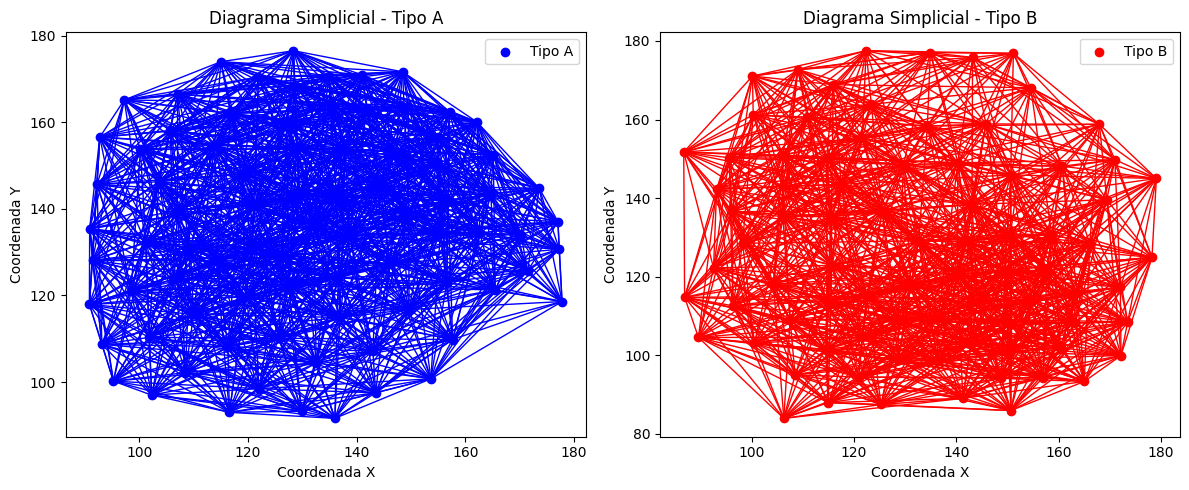

<Figure size 1200x500 with 0 Axes>

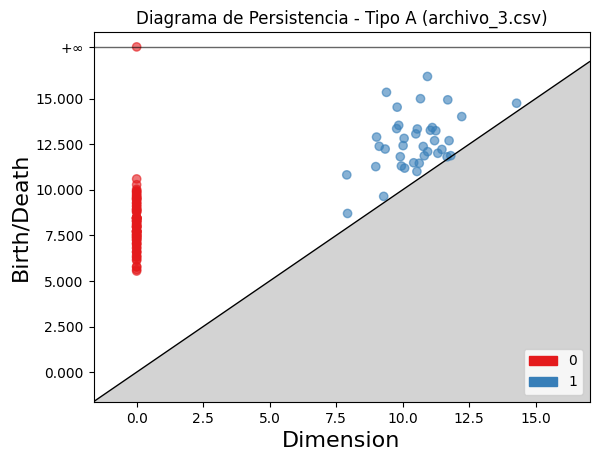

<Figure size 1200x500 with 0 Axes>

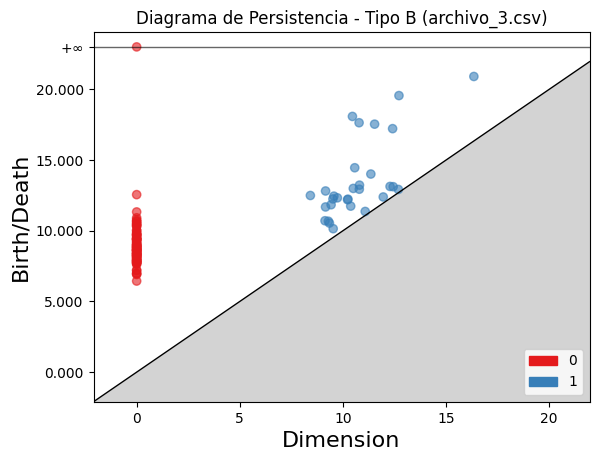

Distancia de Bottleneck: 3.3520808231644317
Distancia de Bottleneck: 1.9626777455177429
Procesado el archivo archivo_3.csv


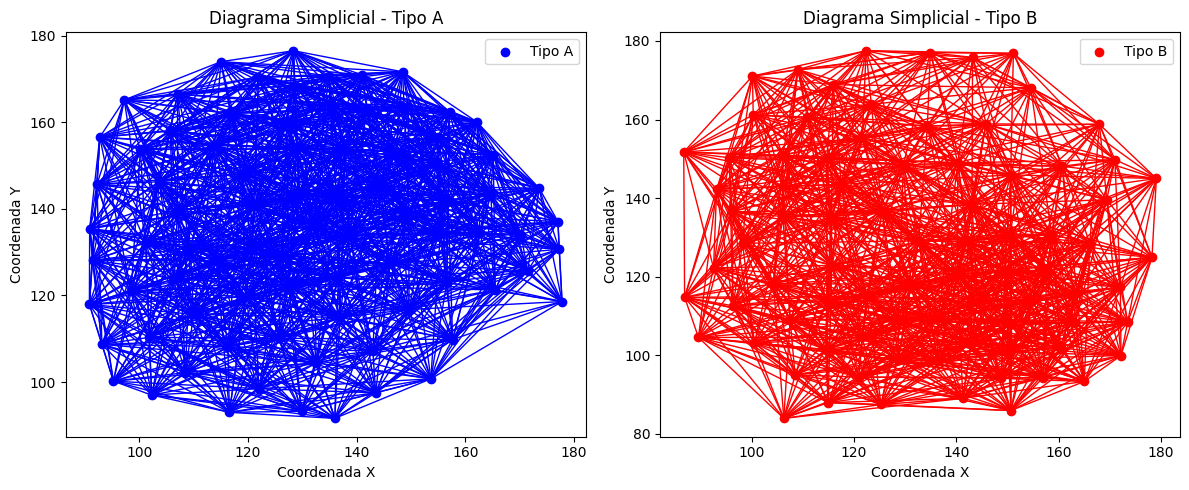

<Figure size 1200x500 with 0 Axes>

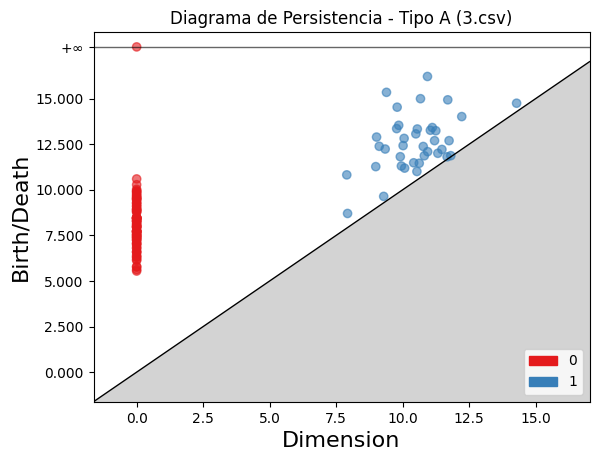

<Figure size 1200x500 with 0 Axes>

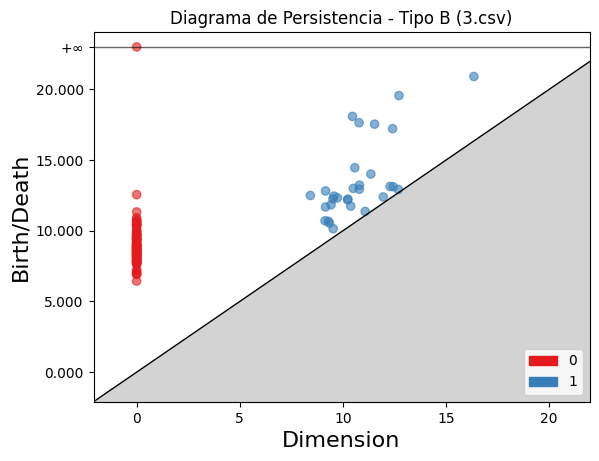

Distancia de Bottleneck: 3.3520808231644317
Distancia de Bottleneck: 1.9626777455177429
Procesado el archivo 3.csv
Distancia de Bottleneck (Dimensión 1, Tipo A) entre archivo_2.csv y archivo_2.csv: 1.4502859797029597e-308
Distancia de Bottleneck (Dimensión 1, Tipo B) entre archivo_2.csv y archivo_2.csv: 2.022240530726959e-308
Distancia de Bottleneck (Dimensión 0, Tipo A) entre archivo_2.csv y archivo_2.csv: 1.514408489973284e-308
Distancia de Bottleneck (Dimensión 0, Tipo B) entre archivo_2.csv y archivo_2.csv: 1.3940264521087503e-308
Distancia de Bottleneck (Dimensión 1, Tipo A) para archivo_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1, Tipo B) para archivo_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0, Tipo A) para archivo_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 0, Tipo B) para archivo_2.csv es efectivamente cero.
Distancia de Bottleneck (Dimensión 1, Tipo A) entre archivo_2.csv y archivo_1.csv: 2.8300872862228665
Dista

In [59]:
diagramas_persistencia_A = {}
diagramas_persistencia_B = {}
diagramas_persistencia_A_0 = {}
diagramas_persistencia_B_0 = {}

# Iterar sobre cada archivo CSV
for archivo_csv in archivos_csv:
    try:
        # Construir la ruta completa del archivo
        ruta_completa = os.path.join(ruta_directorio, archivo_csv)
        
        # Leer el archivo CSV y asignar nombres de columnas
        df = pd.read_csv(ruta_completa, header=None)
        nombres_columnas = ['id', 'Tipo', 'X', 'Y', 'Z']  # Reemplazar con los nombres de columnas apropiados
        df.columns = nombres_columnas
        
        # Agrupar los datos por el ID
        grupos = df.groupby('id')
        
        # Inicializar listas para almacenar los centroides
        centroides_x = []
        centroides_y = []
        tipos_centroides = []
        
        # Calcular el centroide para cada grupo
        for id_grupo, grupo in grupos:
            X_grupo = grupo['X']
            Y_grupo = grupo['Y']
            tipo_grupo = grupo['Tipo'].iloc[0]
            centroid_x_grupo = X_grupo.mean()
            centroid_y_grupo = Y_grupo.mean()
            centroides_x.append(centroid_x_grupo)
            centroides_y.append(centroid_y_grupo)
            tipos_centroides.append(tipo_grupo)
        
        # Separar los centroides por tipo
        centroides_tipo_A = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'A']
        centroides_tipo_B = [(x, y) for x, y, tipo in zip(centroides_x, centroides_y, tipos_centroides) if tipo == 'B']

        # Convertir las coordenadas de los centroides a un formato adecuado para Gudhi
        puntos_tipo_A = np.array(centroides_tipo_A)
        puntos_tipo_B = np.array(centroides_tipo_B)

        # Calcular el complejo de Rips con un radio específico para cada tipo
        rips_complex_tipo_A = gd.RipsComplex(points=puntos_tipo_A, max_edge_length=40)
        rips_complex_tipo_B = gd.RipsComplex(points=puntos_tipo_B, max_edge_length=40)

        # Generar un diagrama simplicial para cada tipo
        simplex_tree_A = rips_complex_tipo_A.create_simplex_tree(max_dimension=3)
        simplex_tree_B = rips_complex_tipo_B.create_simplex_tree(max_dimension=3)

        # Visualizar los diagramas simpliciales para cada tipo
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        for simplex in simplex_tree_A.get_skeleton(1):
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [puntos_tipo_A[i][0] for i in arista]
                y = [puntos_tipo_A[i][1] for i in arista]
                plt.plot(x, y, color='blue', linestyle='-', linewidth=1)  # Color azul para tipo A
        plt.scatter(puntos_tipo_A[:, 0], puntos_tipo_A[:, 1], color='blue', label='Tipo A')
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title('Diagrama Simplicial - Tipo A')
        plt.legend()

        plt.subplot(1, 2, 2)
        for simplex in simplex_tree_B.get_skeleton(1):
            if len(simplex[0]) == 2:  # Asegurarse de que solo sean aristas
                arista = simplex[0]
                x = [puntos_tipo_B[i][0] for i in arista]
                y = [puntos_tipo_B[i][1] for i in arista]
                plt.plot(x, y, color='red', linestyle='-', linewidth=1)  # Color rojo para tipo B
        plt.scatter(puntos_tipo_B[:, 0], puntos_tipo_B[:, 1], color='red', label='Tipo B')
        plt.xlabel('Coordenada X')
        plt.ylabel('Coordenada Y')
        plt.title('Diagrama Simplicial - Tipo B')
        plt.legend()
        plt.tight_layout()
        plt.show()

        # Calcular y mostrar los diagramas de persistencia para cada tipo
        plt.figure(figsize=(12, 5))
        gd.plot_persistence_diagram(simplex_tree_A.persistence(), legend=True)
        plt.title(f'Diagrama de Persistencia - Tipo A ({archivo_csv})')
        plt.xlabel('Dimension')
        plt.ylabel('Birth/Death')
        plt.show()

        plt.figure(figsize=(12, 5))
        gd.plot_persistence_diagram(simplex_tree_B.persistence(), legend=True)
        plt.title(f'Diagrama de Persistencia - Tipo B ({archivo_csv})')
        plt.xlabel('Dimension')
        plt.ylabel('Birth/Death')
        plt.show()

        # Calcular los diagramas de persistencia para cada tipo
        simplex_tree_A.compute_persistence()
        simplex_tree_B.compute_persistence()

        diag_persistencia_tipo_A = simplex_tree_A.persistence_intervals_in_dimension(1)
        diag_persistencia_tipo_B = simplex_tree_B.persistence_intervals_in_dimension(1)
        diag_persistencia_tipo_A_0 = simplex_tree_A.persistence_intervals_in_dimension(0)
        diag_persistencia_tipo_B_0 = simplex_tree_B.persistence_intervals_in_dimension(0)

        # Almacenar los diagramas de persistencia
        diagramas_persistencia_A[archivo_csv] = diag_persistencia_tipo_A
        diagramas_persistencia_B[archivo_csv] = diag_persistencia_tipo_B
        diagramas_persistencia_A_0[archivo_csv] = diag_persistencia_tipo_A_0
        diagramas_persistencia_B_0[archivo_csv] = diag_persistencia_tipo_B_0
        
        
        # Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
        distancia_bottleneck = gd.bottleneck_distance(diag_persistencia_tipo_A, diag_persistencia_tipo_B)
        print("Distancia de Bottleneck:", distancia_bottleneck)

        # Calcular la distancia de Bottleneck entre los dos diagramas de persistencia
        distancia_bottleneck_0 = gd.bottleneck_distance(diag_persistencia_tipo_A_0, diag_persistencia_tipo_B_0)
        print("Distancia de Bottleneck:", distancia_bottleneck_0)

        print(f"Procesado el archivo {archivo_csv}")

    except Exception as e:
        print(f"Error al procesar el archivo {archivo_csv}: {e}")

# Calcular las distancias de Bottleneck entre todos los pares de diagramas de persistencia
archivos = list(diagramas_persistencia_A.keys())
n = len(archivos)
tolerancia = 1e-10  # Tolerancia para considerar distancias efectivamente como cero

for i in range(n):
    for j in range(i, n):
        archivo_i = archivos[i]
        archivo_j = archivos[j]
        
        diag_A_i = diagramas_persistencia_A[archivo_i]
        diag_A_j = diagramas_persistencia_A[archivo_j]
        diag_B_i = diagramas_persistencia_B[archivo_i]
        diag_B_j = diagramas_persistencia_B[archivo_j]

        diag_A_i_0 = diagramas_persistencia_A_0[archivo_i]
        diag_A_j_0 = diagramas_persistencia_A_0[archivo_j]
        diag_B_i_0 = diagramas_persistencia_B_0[archivo_i]
        diag_B_j_0 = diagramas_persistencia_B_0[archivo_j]
        
        distancia_bottleneck_A = gd.bottleneck_distance(diag_A_i, diag_A_j)
        distancia_bottleneck_B = gd.bottleneck_distance(diag_B_i, diag_B_j)
        distancia_bottleneck_A_0 = gd.bottleneck_distance(diag_A_i_0, diag_A_j_0)
        distancia_bottleneck_B_0 = gd.bottleneck_distance(diag_B_i_0, diag_B_j_0)

        print(f"Distancia de Bottleneck (Dimensión 1, Tipo A) entre {archivo_i} y {archivo_j}: {distancia_bottleneck_A}")
        print(f"Distancia de Bottleneck (Dimensión 1, Tipo B) entre {archivo_i} y {archivo_j}: {distancia_bottleneck_B}")
        print(f"Distancia de Bottleneck (Dimensión 0, Tipo A) entre {archivo_i} y {archivo_j}: {distancia_bottleneck_A_0}")
        print(f"Distancia de Bottleneck (Dimensión 0, Tipo B) entre {archivo_i} y {archivo_j}: {distancia_bottleneck_B_0}")
        
        # Verificar que la distancia de Bottleneck para el mismo archivo es efectivamente cero
        if i == j:
            if distancia_bottleneck_A < tolerancia:
                print(f"Distancia de Bottleneck (Dimensión 1, Tipo A) para {archivo_i} es efectivamente cero.")
            else:
                print(f"Distancia de Bottleneck (Dimensión 1, Tipo A) para {archivo_i} no es cero: {distancia_bottleneck_A}")

            if distancia_bottleneck_B < tolerancia:
                print(f"Distancia de Bottleneck (Dimensión 1, Tipo B) para {archivo_i} es efectivamente cero.")
            else:
                print(f"Distancia de Bottleneck (Dimensión 1, Tipo B) para {archivo_i} no es cero: {distancia_bottleneck_B}")

            if distancia_bottleneck_A_0 < tolerancia:
                print(f"Distancia de Bottleneck (Dimensión 0, Tipo A) para {archivo_i} es efectivamente cero.")
            else:
                print(f"Distancia de Bottleneck (Dimensión 0, Tipo A) para {archivo_i} no es cero: {distancia_bottleneck_A_0}")

            if distancia_bottleneck_B_0 < tolerancia:
                print(f"Distancia de Bottleneck (Dimensión 0, Tipo B) para {archivo_i} es efectivamente cero.")
            else:
                print(f"Distancia de Bottleneck (Dimensión 0, Tipo B) para {archivo_i} no es cero: {distancia_bottleneck_B_0}")